In [1]:
import sys
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from celluloid import Camera
from IPython.display import Video

In [45]:
observable_distribution_file = '/Users/bethclark/Projects/Flora_Family/data/real_flora/flora_5km_up.list'
# synthetic_distributions = ['/Users/bethclark/Projects/Flora_Family/data/v1_florks', '/Users/bethclark/Projects/Flora_Family/data/v2_florks']
synthetic_distributions = ['/Users/bethclark/Projects/Flora_Family/data/v5_florks']

In [34]:
observables = {}
with open(observable_distribution_file) as f:
    for line in f.readlines():
        row = line.split()
        a_num = int(row[1])
        a = float(row[2])
        e = float(row[3])
        i = np.arcsin(float(row[4]))
        size = float(row[5])
        observables[a_num] = {'size':size, 'a':a, 'e':e, 'i':i}
print(len(observables.keys()))


632


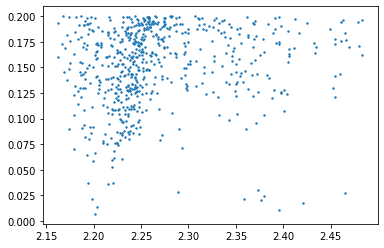

In [35]:
plt.scatter([observables[key]['a'] for key in observables], [1/observables[key]['size'] for key in observables], s=2)

In [16]:
# [f for f in Path(synthetic_distributions).iterdir()]

In [52]:
synthetic_data = {}
spin_data = {}
for j, synthetic_distribution in enumerate(synthetic_distributions):
    synthetic_files = [f for f in Path(synthetic_distribution).iterdir()]
    synthetic_files.sort()
    synthetic_files = [synthetic_files[-1]] + synthetic_files[:-1]
    for fpath in synthetic_files:
        if fpath.stem == "spins":
            with open(fpath) as f:
                for line in f.readlines():
                    row = line.split('\t')
                    key = row[0]
                    spin = float(row[1])
                    spin_data[key] = spin
            continue
        with open(fpath) as f:
            year = int(fpath.stem.split('M')[0])
            if year not in list(synthetic_data.keys()):
                synthetic_data[year] = {}
            for line in f.readlines():
                row = line.split('\t')
                key = row[0]
                # size = float(key[:-2])
                size = float(row[1])
                a = float(row[2])
                e = float(row[3])
                i = float(row[4])
                if len(spin_data.keys()) > 1:
                    spin = spin_data[key]
                else:
                    spin = 1 if int(key)%2 == 0 else 1
                synthetic_data[year][key] = {'size':size, 'a':a, 'e':e, 'i':i, 'spin':spin}
print('Number of initial Datapoints: {}'.format(len(synthetic_data[0].keys())))

Number of initial Datapoints: 3192


In [7]:
ks = ['10.0400_0_0', '10.0400_0_1']

In [8]:
years = list(synthetic_data.keys())
years.sort()
years = years[:]

In [9]:
PoI = [] # Identify the particles that are present outside of the V at end of sim
for key in synthetic_data[1000]:
    data = synthetic_data[1000][key]
    if data['a'] > 2.252:
        PoI.append(key)
PoI2 = [] # Identify left wing
for key in synthetic_data[1000]:
    data = synthetic_data[1000][key]
    if data['a'] < 2.2:
        PoI2.append(key)

# CrazyGuys = ['40.8400_0', '50.1400_5']

(2.15, 2.45)

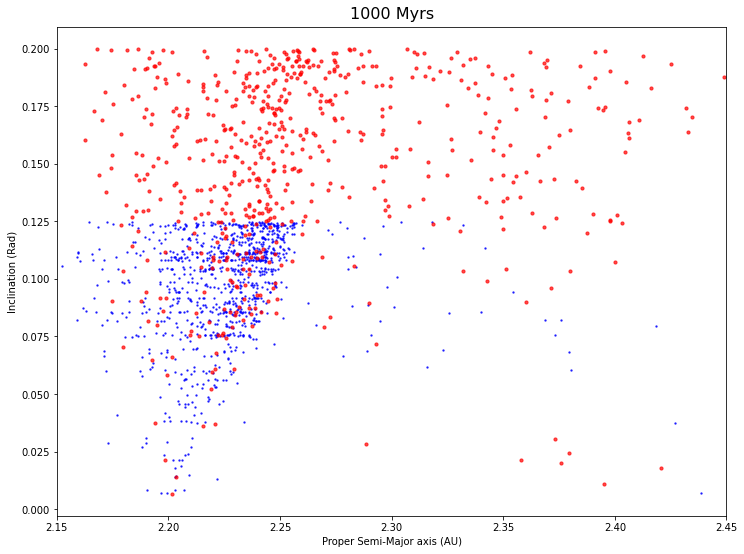

In [53]:
plt.figure(figsize=(12,9))
data = synthetic_data[1000]
# plt.axvline(2.252)
# plt.axvline(2.2)
plt.scatter([data[key]['a'] for key in data], [1/data[key]['size'] for key in data], s=2, alpha=.7, c='blue')
# plt.scatter([data[key]['a'] for key in PoI], [1/data[key]['size'] for key in PoI], s=60, alpha=.7, c='green')
# plt.scatter([data[key]['a'] for key in CrazyGuys], [1/data[key]['size'] for key in CrazyGuys], s=60, alpha=.7, c='purple')
# plt.scatter([data[key]['a'] for key in PoI2], [1/data[key]['size'] for key in PoI2], s=60, alpha=.7, c='grey')
plt.scatter([observables[key]['a'] for key in observables], [1/observables[key]['size'] for key in observables], s=10, alpha=.7, c='red')
plt.text(0.5, 1.01,'{} Myrs'.format(years[-1]), ha="center",va="bottom", fontsize=16, transform = plt.gca().transAxes)
plt.xlabel('Proper Semi-Major axis (AU)')
plt.ylabel('Inclination (Rad)')
plt.xlim(2.15, 2.45)
# plt.ylim(0.00, 0.15)

In [56]:
fig = plt.figure(figsize=(12, 9))
camera = Camera(fig)
for year in years:
    data = synthetic_data[year]
    plt.scatter([data[key]['a'] for key in data], [1/data[key]['size'] for key in data], s=2, alpha=.7, c='blue')
    # plt.scatter([data[key]['a'] for key in PoI], [1/data[key]['size'] for key in PoI], s=60, alpha=.7, c='green')
    # plt.scatter([data[key]['a'] for key in CrazyGuys], [1/data[key]['size'] for key in CrazyGuys], s=60, alpha=.7, c='purple')
    # plt.scatter([data[key]['a'] for key in PoI2], [1/data[key]['size'] for key in PoI2], s=60, alpha=.7, c='grey')
    plt.scatter([observables[key]['a'] for key in observables], [1/observables[key]['size'] for key in observables], s=10, alpha=.7, c='red')
    plt.text(0.5, 1.01,'{} Myrs'.format(year), ha="center",va="bottom", fontsize=16, transform = plt.gca().transAxes)
    plt.xlabel('Proper Semi-Major axis (AU)')
    plt.ylabel('1/Size (1/Km)')
    plt.xlim(2.15, 2.45)
    camera.snap()
animation = camera.animate(blit=True)
# animation.save("../figures/v1_AvsSize_florks.gif", writer = 'pillow', dpi=300)
animation.save("../figures/v5_AvsSize_florks.mp4", dpi=300)
plt.close()

In [54]:
fig = plt.figure(figsize=(12, 9))
camera = Camera(fig)
aq_mars = np.linspace(2, 3, 100)
eq_mars = [(a-1.666)/a for a in aq_mars]
for year in years:
    data = synthetic_data[year]
    plt.scatter([data[key]['a'] for key in data], [data[key]['e'] for key in data], s=2, alpha=.7, c='blue')
    # plt.scatter([data[key]['a'] for key in PoI], [data[key]['e'] for key in PoI], s=60, alpha=.7, c='green')
    # plt.scatter([data[key]['a'] for key in CrazyGuys], [data[key]['e'] for key in CrazyGuys], s=60, alpha=.7, c='purple')
    # plt.scatter([data[key]['a'] for key in PoI2], [data[key]['e'] for key in PoI2], s=60, alpha=.7, c='grey')
    plt.plot(aq_mars, eq_mars, ls = '--', c = 'k')
    plt.scatter([observables[key]['a'] for key in observables], [observables[key]['e'] for key in observables], s=10, alpha=.7, c='red')
    plt.text(0.5, 1.01,'{} Myrs'.format(year), ha="center",va="bottom", fontsize=16, transform = plt.gca().transAxes)
    plt.xlabel('Proper Semi-Major axis', fontsize = 12)
    plt.ylabel('Proper Ecentricity', fontsize = 12)
    plt.xlim(2.15, 2.45)
    plt.ylim(0.0, 0.3)
    camera.snap()

animation = camera.animate(blit=True)
animation.save("../figures/v5_AvsE_florks.mp4", dpi=300)
plt.close()

In [55]:
fig = plt.figure(figsize=(12, 9))
camera = Camera(fig)
for year in years:
    data = synthetic_data[year]
    plt.scatter([data[key]['a'] for key in data], [data[key]['i'] for key in data], s=2, alpha=.7, c='blue')
    # plt.scatter([data[key]['a'] for key in PoI], [data[key]['i'] for key in PoI], s=60, alpha=.7, c='green')
    # plt.scatter([data[key]['a'] for key in CrazyGuys], [data[key]['i'] for key in CrazyGuys], s=60, alpha=.7, c='purple')
    # plt.scatter([data[key]['a'] for key in PoI2], [data[key]['i'] for key in PoI2], s=60, alpha=.7, c='grey')
    plt.scatter([observables[key]['a'] for key in observables], [observables[key]['i'] for key in observables], s=10, alpha=.7, c='red')
    plt.text(0.5, 1.01,'{} Myrs'.format(year), ha="center",va="bottom", fontsize=16, transform = plt.gca().transAxes)
    plt.xlabel('Proper Semi-Major axis (AU)')
    plt.ylabel('Inclination (Rad)')
    plt.xlim(2.15, 2.45)
    plt.ylim(0.00, 0.15)
    camera.snap()
animation = camera.animate(blit=True)
animation.save("../figures/v5_AvsI_florks.mp4", dpi=300)
plt.close()

In [57]:
Video("../figures/v5_AvsSize_florks.mp4", width=800)

In [58]:
Video("../figures/v5_AvsE_florks.mp4", width=750)

In [59]:
Video("../figures/v5_AvsI_florks.mp4", width=750)

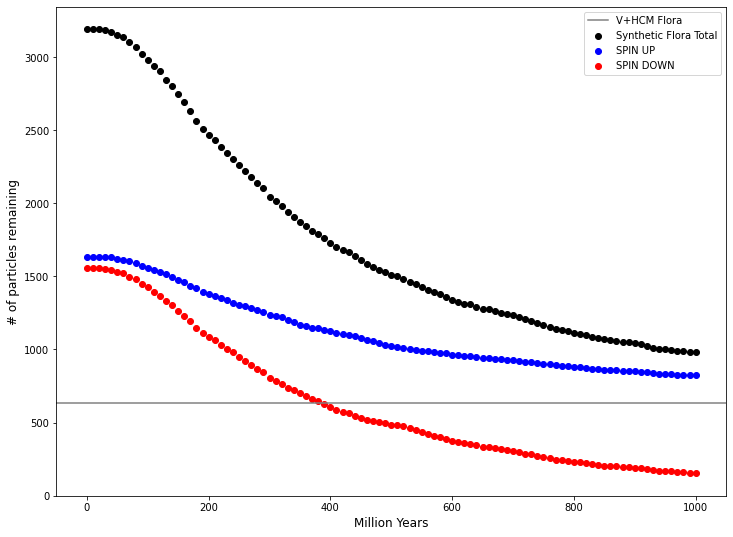

In [60]:
plt.figure(figsize=(12,9))
Num_spin_up = []
Num_spin_down = []
for year in synthetic_data:
    data = synthetic_data[year]
    num_spin_up = 0
    num_spin_down = 0
    for key in data:
        p_data = data[key]
        if p_data['spin'] > 0:
            num_spin_up += 1
        if p_data['spin'] < 0:
            num_spin_down += 1
    Num_spin_up.append(num_spin_up)
    Num_spin_down.append(num_spin_down)

plt.scatter(synthetic_data.keys(), [len(synthetic_data[year].keys()) for year in synthetic_data], label='Synthetic Flora Total', c='k')
plt.scatter(synthetic_data.keys(), Num_spin_up, label='SPIN UP', c='blue')
plt.scatter(synthetic_data.keys(), Num_spin_down, label='SPIN DOWN', c='red')
plt.axhline(len(observables.keys()), c='grey', label='V+HCM Flora')
plt.xlabel('Million Years', fontsize=12)
plt.ylabel('# of particles remaining', fontsize=12)
plt.ylim(0)
plt.legend()

In [61]:
min(Num_spin_down)

155

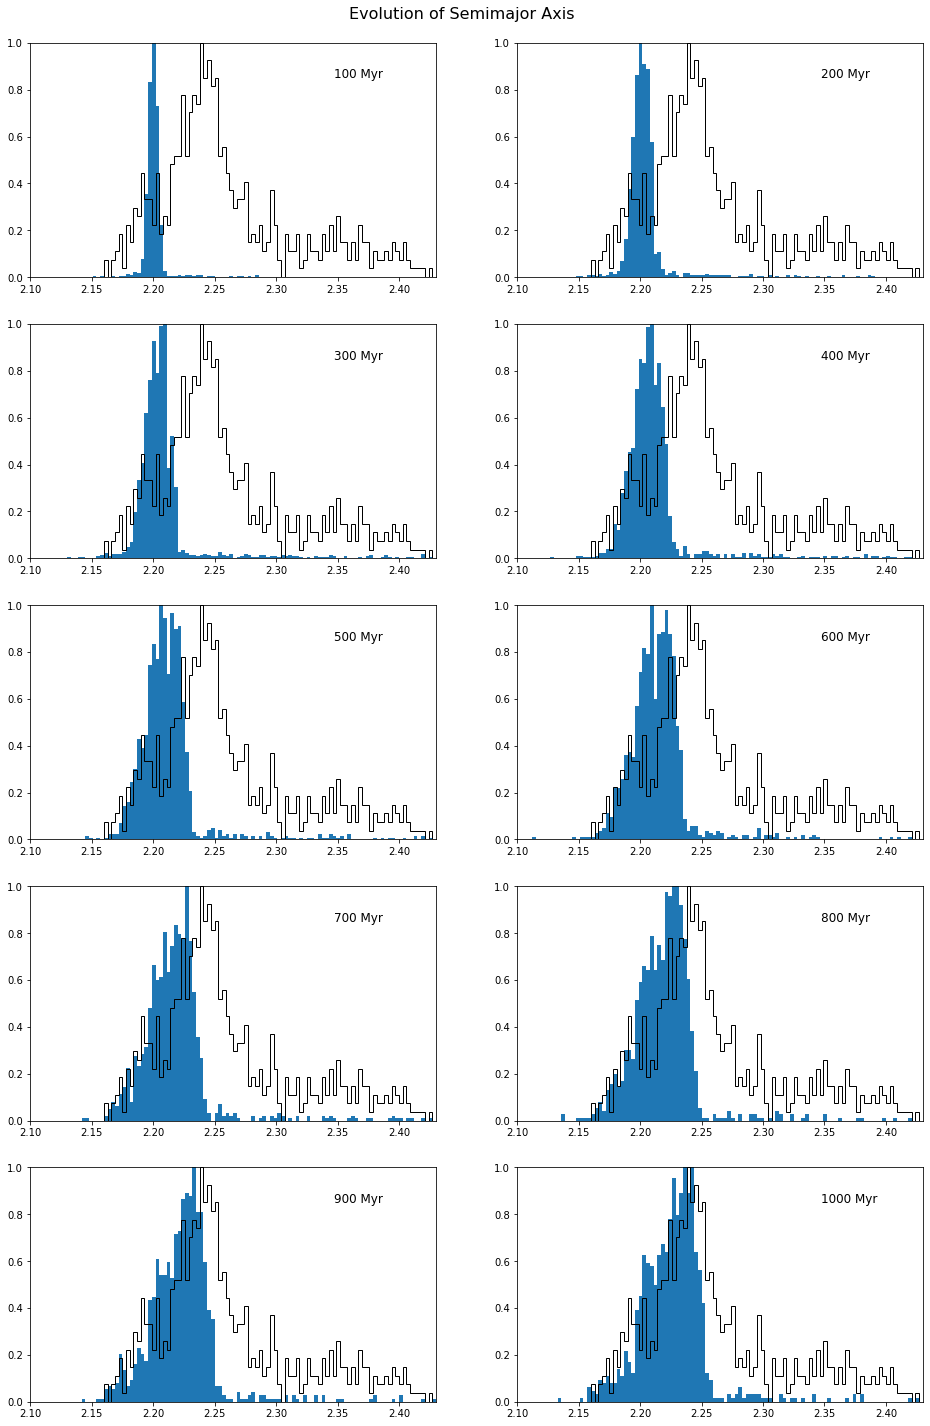

In [62]:
bins = np.arange(2.10, 2.5, .003)
plt.figure(figsize=(16, 25))
for i, year in enumerate(np.arange(100,1001, 100)):
    plt.subplot(5, 2, i+1)
    x, bins, p = plt.hist([synthetic_data[year][key]['a'] for key in synthetic_data[year]], bins=bins, density=False)
    for item in p:
        item.set_height(item.get_height()/max(x))
    x, bins, p = plt.hist([observables[key]['a'] for key in observables], bins=bins, density=False, ec="black", histtype='step')
    for i, vert in enumerate(p[0]._path.vertices):
        p[0]._path.vertices[i] = [vert[0], vert[1]/max(x)]
    plt.ylim(0,1)
    plt.xlim(2.1, 2.43)
    plt.text(.75, .85, '{} Myr'.format(year), transform = plt.gca().transAxes, fontsize=12)
plt.suptitle('Evolution of Semimajor Axis', fontsize=16, y=.9)
plt.savefig('../figures/v5_hist_semimajor.pdf')

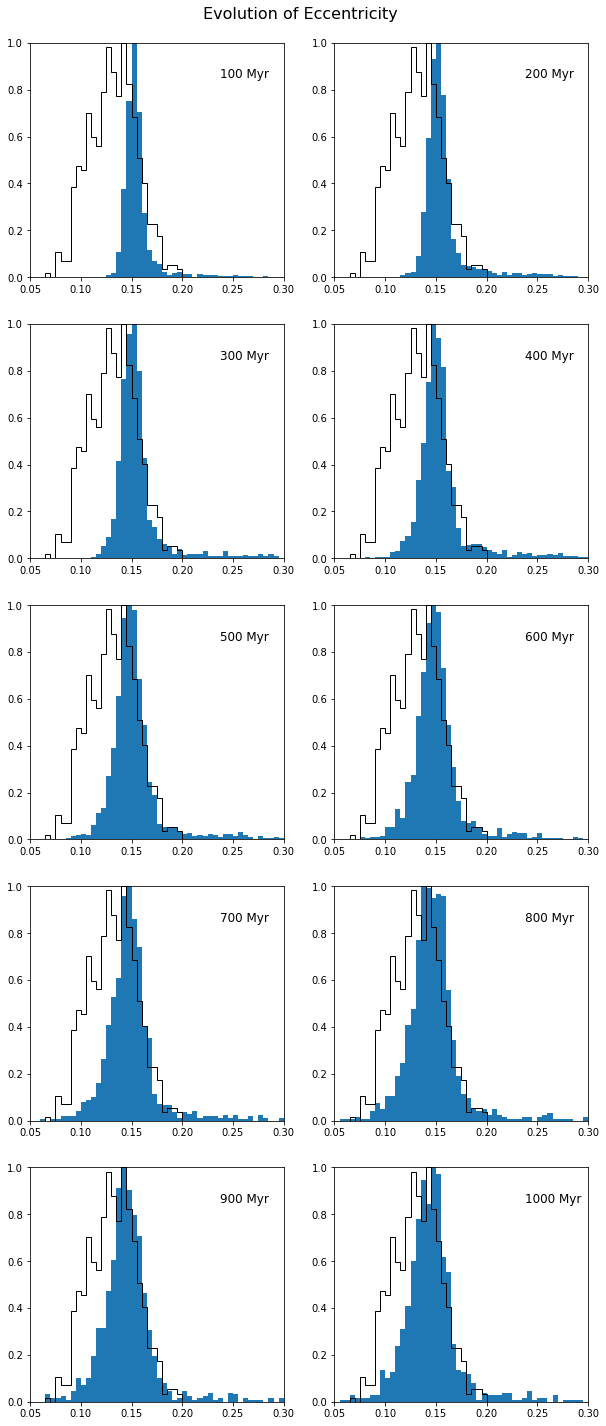

In [63]:
bins = np.arange(0.0, 0.35, .005)
plt.figure(figsize=(10, 25))
for i, year in enumerate(np.arange(100,1001, 100)):
    plt.subplot(5, 2, i+1)
    x, bins, p = plt.hist([synthetic_data[year][key]['e'] for key in synthetic_data[year]], bins=bins, density=True)
    for item in p:
        item.set_height(item.get_height()/max(x))
    x, bins, p = plt.hist([observables[key]['e'] for key in observables], bins=bins, density=True, ec="black", histtype='step')
    for i, vert in enumerate(p[0]._path.vertices):
        p[0]._path.vertices[i] = [vert[0], vert[1]/max(x)]
    plt.ylim(0,1)
    plt.xlim(0.05, 0.3)
    plt.text(.75, .85, '{} Myr'.format(year), transform = plt.gca().transAxes, fontsize=12)
plt.suptitle('Evolution of Eccentricity', fontsize=16, y=.9)
plt.savefig('../figures/v5_hist_eccentricity.pdf')

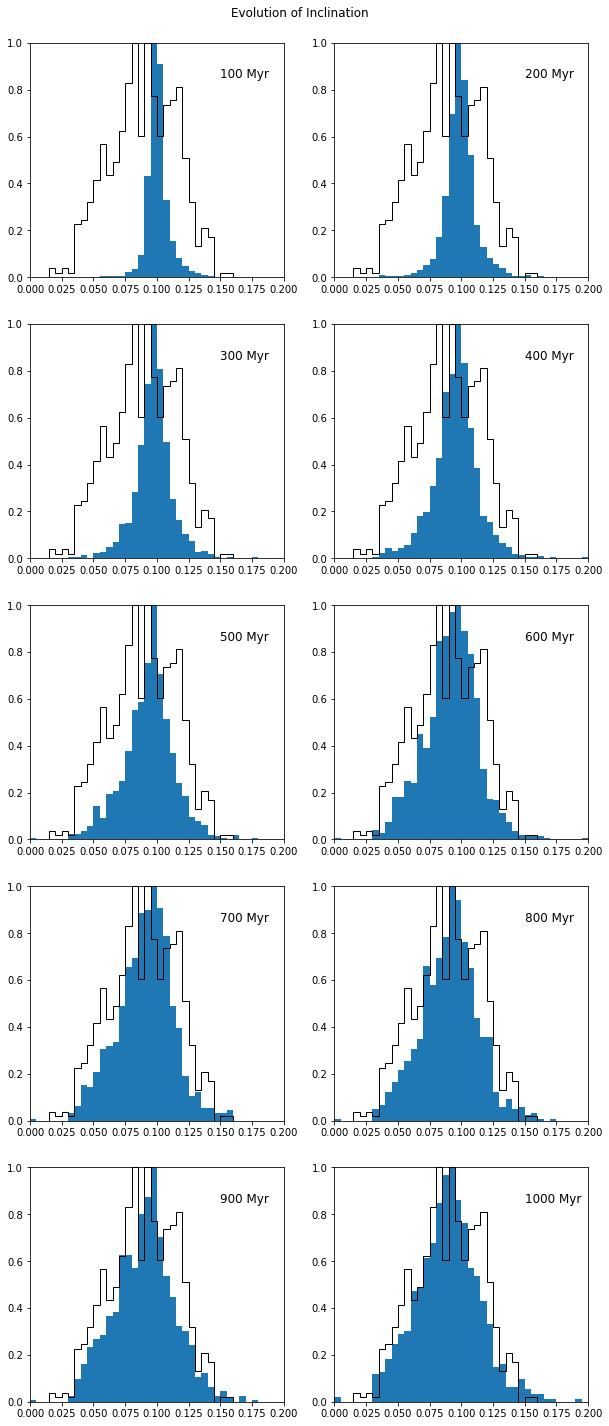

In [64]:
bins = np.arange(0.00, 0.3, .005)
plt.figure(figsize=(10, 25))
for i, year in enumerate(np.arange(100,1001, 100)):
    plt.subplot(5, 2, i+1)
    x, bins, p = plt.hist([synthetic_data[year][key]['i'] for key in synthetic_data[year]], bins=bins, density=True)
    for item in p:
        item.set_height(item.get_height()/max(x))
    x, bins, p = plt.hist([observables[key]['i'] for key in observables], bins=bins, density=True, ec="black", histtype='step')
    for i, vert in enumerate(p[0]._path.vertices):
        p[0]._path.vertices[i] = [vert[0], vert[1]/max(x)]
    plt.ylim(0,1)
    plt.xlim(0.0, 0.2)
    plt.text(.75, .85, '{} Myr'.format(year), transform = plt.gca().transAxes, fontsize=12)
plt.suptitle('Evolution of Inclination', fontsize=12, y=.9)
plt.savefig('../figures/v5_hist_inclination.pdf')